In [34]:
import EFC_learningTMS.globals as gl
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PcmPy as pcm
import seaborn as sb
from globals import chord_mapping

plt.style.use('default')

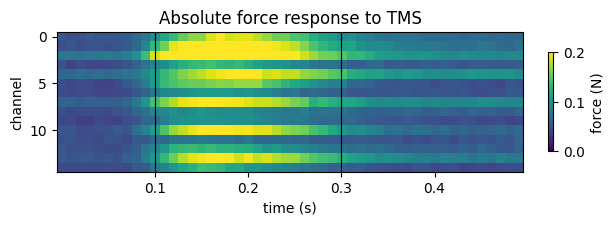

In [35]:
sn = 104
path = os.path.join(gl.baseDir, gl.behavDir, f'p{sn}_testing')
force = np.load(os.path.join(path, 'forceTMS.npy'))
force_abs_avg = np.abs(force).mean(axis=0)
tinfo = pd.read_csv(os.path.join(path, 'single_trial.tsv'), sep='\t')
tinfoGo = tinfo[tinfo['condition']=='TMS']

fig, ax = plt.subplots()

tAx = np.linspace(0, .5, 51)

ax.imshow(force_abs_avg, vmin=0, vmax=.2)
ax.axvline(10, color='k', lw=.8)
ax.axvline(30, color='k', lw=.8)
ax.set_xticks([10, 20, 30, 40])
ax.set_xticklabels(tAx[[10, 20, 30, 40]])
ax.set_xlabel('time (s)')
ax.set_ylabel('channel')
cax = ax.get_images()[0]
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', fraction=.01, label='force (a.u.)')
ax.set_title('Absolute force response to TMS')

plt.show()

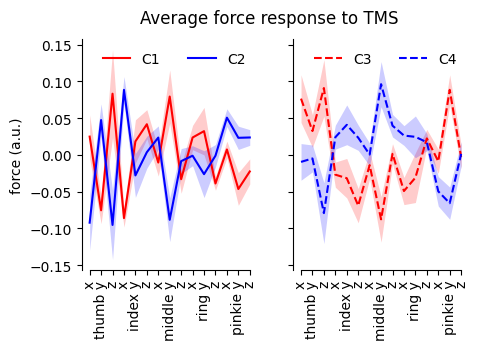

In [64]:
force_resp = force[:, :, 10:30].mean(axis=-1)
force_respAvg = force_resp.mean(axis=0, keepdims=True)
force_respCh = np.zeros((4, force_resp.shape[0] // 4, force_resp.shape[1]))
chordLabel = ['C1', 'C2', 'C3', 'C4']
for ch, chordID in enumerate(chordLabel):
    force_respCh[ch] = force_resp[tinfoGo.Chord==chordID] - force_respAvg

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(5, 3))
channels = ['x', 'thumb y', 'z', 'x', 'index y', 'z', 'x', 'middle y', 'z', 'x', 'ring y', 'z', 'x', 'pinkie y', 'z']
color = ['red', 'blue']
ls = ['-', '--']
for ch in range(force_respCh.shape[0]):
    ax = axs[ch // 2]
    avg = force_respCh[ch].mean(axis=0)
    sem = force_respCh[ch].std(axis=0) / np.sqrt(force_respCh.shape[1])
    ax.plot(np.arange(force_resp.shape[1]), avg, color=color[ch % 2], ls=ls[ch // 2], label=chordLabel[ch])
    ax.fill_between(np.arange(force_resp.shape[1]), avg - sem, avg + sem, color=color[ch % 2], alpha=.2, lw=0)
    ax.set_xticks(np.arange(force_resp.shape[1]))
    ax.set_xticklabels(channels, rotation=90)
    ax.legend(loc='upper right', ncol=2, frameon=False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines['bottom'].set_bounds(0, len(channels)-1)

axs[0].set_ylabel('force (a.u.)')

fig.suptitle('Average force response to TMS')

plt.show()